In [1]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
model = keras.models.load_model('dogs-vs-cats.h5')

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open('clothing-model.tflite', 'wb') as f_out:
    f_out.write(tflite_model)

In [5]:
!ls -lh clothing-model.tflite

-rw-r--r-- 1 alexey 197121 43M Dec  1 22:27 clothing-model.tflite


In [2]:
import tensorflow.lite as tflite

In [3]:
interpreter = tflite.Interpreter(model_path='clothing-model.tflite')
interpreter.allocate_tensors()

input_index = interpreter.get_input_details()[0]['index']
output_index = interpreter.get_output_details()[0]['index']

In [4]:
output_index

13

In [6]:
from io import BytesIO
from urllib import request

from PIL import Image

def download_image(url):
    with request.urlopen(url) as resp:
        buffer = resp.read()
    stream = BytesIO(buffer)
    img = Image.open(stream)
    return img


def prepare_image(img, target_size):
    if img.mode != 'RGB':
        img = img.convert('RGB')
    img = img.resize(target_size, Image.NEAREST)
    return img

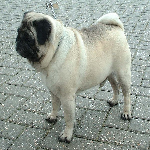

In [9]:
img = download_image('https://upload.wikimedia.org/wikipedia/commons/9/9a/Pug_600.jpg')
img = prepare_image(img, target_size=(150, 150))
img

In [10]:
import numpy as np

In [13]:
def prepare_input(x):
    return x / 255.0

In [19]:
x = np.array(img, dtype='float32')
X = np.array([x])
X = prepare_input(X)

In [20]:
X[0, 0, 0, 0]

0.7058824

In [21]:
interpreter.set_tensor(input_index, X)
interpreter.invoke()

preds = interpreter.get_tensor(output_index)

In [22]:
preds

array([[0.7704913]], dtype=float32)